In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh

# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# import as usual
import functions

# autoreload
%load_ext autoreload
%autoreload 2

#defining DataFrame
df = functions.read_file('../data/PIRUS_March2023/PIRUS_V4.xlsx')


In [2]:
# df.head()

df.shape

(3203, 130)

In [3]:
df[df.isnull().any(axis=1)]

,Subject_ID,Loc_Plot_State1,Loc_Plot_City1,Loc_Plot_State2,Loc_Plot_City2,Year_Exposure,Plot_Target1,Plot_Target2,Plot_Target3,Attack_Preparation,...,Trauma,Other_Ideologies,Angry_US,Group_Grievance,Component_ID,Component_Density,Lone_Offender,Degree_Centrality,Betweenness_Centrality,Closeness_Centrality
0,1000,Illinois,Chicago,Florida,Broward County,2002,14,NaN,NaN,1,...,0,0,0,0,6,0.190000,0,5,0.112319,0.444444
1,1001,California,San Francisco,NaN,NaN,2001,-88,NaN,NaN,-88,...,-99,0,1,-99,1525,-88.000000,1,0,0.000000,0.000000
2,1002,California,Santa Ana,NaN,NaN,1997,-99,NaN,NaN,-99,...,-99,0,1,1,471,1.000000,0,1,0.000000,1.000000
3,1005,New York,New York,NaN,NaN,1993,1,NaN,NaN,2,...,0,0,1,2,9,0.573099,0,9,0.179739,0.666667
4,1006,New York,New York,NaN,NaN,1993,1,NaN,NaN,2,...,-99,0,1,-99,9,0.573099,0,9,0.179739,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,12147,District of Columbia,Washington,NaN,NaN,2021,2,3.0,NaN,1,...,0,0,1,0,1535,-88.000000,1,0,0.000000,0.000000
3199,12148,District of Columbia,Washington,NaN,NaN,2021,2,3.0,NaN,1,...,0,0,1,0,38,0.527778,0,3,0.428571,0.615385
3200,12149,Oregon,Salem,NaN,NaN,2021,14,NaN,NaN,-99,...,0,0,0,0,1,0.005436,0,4,0.000000,0.098882
3201,3655,Montana,-99,NaN,NaN,2000,-88,NaN,NaN,-88,...,-99,0,-99,-99,1028,-88.000000,1,0,0.000000,0.000000


In [4]:
# Create new Excel file with only subjects of US Military backgrounds and only relevant columns.
functions.mil_filter(df, start_year=2000)

In [5]:
#Instantiate filtered military Dataset
fil_mil = functions.read_file('../data/PIRUS_March2023/final_mil.xlsx')
fil_mil.drop(columns=['Unnamed: 0'], inplace=True)


print(fil_mil.shape)
fil_mil.head(5)

(343, 15)


,Subject_ID,Year_Exposure,Radicalization_Islamist,Radicalization_Far_Right,Radicalization_Far_Left,Radicalization_Single_Issue,Ideological_Sub_Category1,Actively_Recruited,Internet_Radicalization,Media_Radicalization,Social_Media,Social_Media_Platform1,Foreign_Govt_Leader,US_Govt_Leader,Event_Influence1
0,10127,2021,0,1,0,0,4,-99,1,1,2,1,0,1,12
1,10133,2021,0,1,0,0,1,-99,1,0,1,1,0,1,13
2,10147,2021,0,1,0,0,4,0,1,1,1,1,0,1,1
3,10148,2021,0,1,0,0,1,0,1,0,2,-99,0,1,13
4,10150,2021,0,1,0,0,4,0,1,2,2,2,0,1,13


In [6]:
sub_groups = {
1 : "Militia/gun rights",
2 : "Neo-Nazi",
3 : "Xenophobic",
4 : "Anti-government",
5 : "Christian Identity",
6 : "Environmentalist",
7 : "New Left",
8 : "Black Nationalist",
9 : "Communist",
10 : "Anarchist",
11 : "Islamist",
12 : "Puerto Rican Nationalist",
13 : "Irish Republican Army",
14 : "Cult",
15 : "Anti-abortion",
16 : "Jewish Defense League",
17 : "Anti-LGBTQ",
18 : "Other",
19 : "Male supremacist",
20 : "Moorish sovereign",
21 : "Pro-Trump extremist",
22 : "Anti-Trump extremist",
23 : "Anti-Law Enforcement"
}

In [7]:
#Making Columns Human Readable


functions.value_change(fil_mil, "Ideological_Sub_Category1", sub_groups, "Ideological Group")

fil_mil.head(5)

,Subject_ID,Year_Exposure,Radicalization_Islamist,Radicalization_Far_Right,Radicalization_Far_Left,Radicalization_Single_Issue,Actively_Recruited,Internet_Radicalization,Media_Radicalization,Social_Media,Social_Media_Platform1,Foreign_Govt_Leader,US_Govt_Leader,Event_Influence1,Ideological Group
0,10127,2021,0,1,0,0,-99,1,1,2,1,0,1,12,Anti-government
1,10133,2021,0,1,0,0,-99,1,0,1,1,0,1,13,Militia/gun rights
2,10147,2021,0,1,0,0,0,1,1,1,1,0,1,1,Anti-government
3,10148,2021,0,1,0,0,0,1,0,2,-99,0,1,13,Militia/gun rights
4,10150,2021,0,1,0,0,0,1,2,2,2,0,1,13,Anti-government


In [8]:
rad_ideo = {
    0 : "No",
    1 : "Yes",
    -99: "Unknown"
}

functions.value_change(fil_mil, "Radicalization_Islamist", rad_ideo, "Radical Islamist")
functions.value_change(fil_mil, "Radicalization_Far_Right", rad_ideo, "Radical Far Right")
functions.value_change(fil_mil, "Radicalization_Far_Left", rad_ideo, "Radical Far Left")
functions.value_change(fil_mil, "Radicalization_Single_Issue", rad_ideo, "Single Issue Radical")

fil_mil.head(5)

,Subject_ID,Year_Exposure,Actively_Recruited,Internet_Radicalization,Media_Radicalization,Social_Media,Social_Media_Platform1,Foreign_Govt_Leader,US_Govt_Leader,Event_Influence1,Ideological Group,Radical Islamist,Radical Far Right,Radical Far Left,Single Issue Radical
0,10127,2021,-99,1,1,2,1,0,1,12,Anti-government,No,Yes,No,No
1,10133,2021,-99,1,0,1,1,0,1,13,Militia/gun rights,No,Yes,No,No
2,10147,2021,0,1,1,1,1,0,1,1,Anti-government,No,Yes,No,No
3,10148,2021,0,1,0,2,-99,0,1,13,Militia/gun rights,No,Yes,No,No
4,10150,2021,0,1,2,2,2,0,1,13,Anti-government,No,Yes,No,No


In [9]:
recruited = {
  0 : "No",
  1 : "Yes",
  -99: "Unknown"
}

functions.value_change(fil_mil, "Actively_Recruited", recruited, "Actively Recruited")

fil_mil.head(3)

,Subject_ID,Year_Exposure,Internet_Radicalization,Media_Radicalization,Social_Media,Social_Media_Platform1,Foreign_Govt_Leader,US_Govt_Leader,Event_Influence1,Ideological Group,Radical Islamist,Radical Far Right,Radical Far Left,Single Issue Radical,Actively Recruited
0,10127,2021,1,1,2,1,0,1,12,Anti-government,No,Yes,No,No,Unknown
1,10133,2021,1,0,1,1,0,1,13,Militia/gun rights,No,Yes,No,No,Unknown
2,10147,2021,1,1,1,1,0,1,1,Anti-government,No,Yes,No,No,No


In [10]:
rad_means = {
    0 : "No",
    1 : "Reaffirmed Beliefs",
    2 : "Primary",
    -99 : "Unknown",
    -88 : "N/A"
}
functions.value_change(fil_mil, "Internet_Radicalization", rad_means, "Internet")
functions.value_change(fil_mil, "Media_Radicalization", rad_means, "Media")
functions.value_change(fil_mil, "Social_Media", rad_means, "Social Media")

fil_mil.head(3)

,Subject_ID,Year_Exposure,Social_Media_Platform1,Foreign_Govt_Leader,US_Govt_Leader,Event_Influence1,Ideological Group,Radical Islamist,Radical Far Right,Radical Far Left,Single Issue Radical,Actively Recruited,Internet,Media,Social Media
0,10127,2021,1,0,1,12,Anti-government,No,Yes,No,No,Unknown,Reaffirmed Beliefs,Reaffirmed Beliefs,Primary
1,10133,2021,1,0,1,13,Militia/gun rights,No,Yes,No,No,Unknown,Reaffirmed Beliefs,No,Reaffirmed Beliefs
2,10147,2021,1,0,1,1,Anti-government,No,Yes,No,No,No,Reaffirmed Beliefs,Reaffirmed Beliefs,Reaffirmed Beliefs


In [11]:
rad_sites = {
    1 : "Facebook",
    2 : "Twitter",
    3 : "YouTube",
    4 : "Vimeo",
    5 : "Instagram",
    6 : "Flickr",
    7 : "Tumblr",
    8 : "Imgur",
    9 : "Snapchat",
    10 : "Google Plus",
    11 : "Skype",
    12 : "LinkedIn",
    13 : "MySpace",
    14 : "4chan",
    15 : "Reddit",
    16 : "Ask.fm",
    17 : "WhatsApp",
    18 : "Surespot",
    19 : "Telegram",
    20 : "Kik",
    21 : "Paltalk",
    22 : "VK",
    23 : "Diaspora",
    24 : "JustPaste.it",
    25 : "SoundCloud",
    26 : "Personal blogging websites",
    27 : "Other non-encrypted software",
    28 : "Other encrypted software/unspecified encrypted software",
    29 : "Discord",
    30 : "Gab",
    31 : "Iron March",
    32 : "Parler",
    33 : "Wire",
   -99 : "Unknown",
   -88 : "N/A"
 }
functions.value_change(fil_mil, "Social_Media_Platform1", rad_sites, "Social Media Platform")

fil_mil.head(3)

,Subject_ID,Year_Exposure,Foreign_Govt_Leader,US_Govt_Leader,Event_Influence1,Ideological Group,Radical Islamist,Radical Far Right,Radical Far Left,Single Issue Radical,Actively Recruited,Internet,Media,Social Media,Social Media Platform
0,10127,2021,0,1,12,Anti-government,No,Yes,No,No,Unknown,Reaffirmed Beliefs,Reaffirmed Beliefs,Primary,Facebook
1,10133,2021,0,1,13,Militia/gun rights,No,Yes,No,No,Unknown,Reaffirmed Beliefs,No,Reaffirmed Beliefs,Facebook
2,10147,2021,0,1,1,Anti-government,No,Yes,No,No,No,Reaffirmed Beliefs,Reaffirmed Beliefs,Reaffirmed Beliefs,Facebook


In [12]:
govt_leader = {
  0 : "No",
  1 : "Yes",
  -99: "Unknown"
}

functions.value_change(fil_mil, "Foreign_Govt_Leader", govt_leader, "Foreign Govt Leader")
functions.value_change(fil_mil, "US_Govt_Leader", govt_leader, "US Govt Leader")

fil_mil.head(3)

,Subject_ID,Year_Exposure,Event_Influence1,Ideological Group,Radical Islamist,Radical Far Right,Radical Far Left,Single Issue Radical,Actively Recruited,Internet,Media,Social Media,Social Media Platform,Foreign Govt Leader,US Govt Leader
0,10127,2021,12,Anti-government,No,Yes,No,No,Unknown,Reaffirmed Beliefs,Reaffirmed Beliefs,Primary,Facebook,No,Yes
1,10133,2021,13,Militia/gun rights,No,Yes,No,No,Unknown,Reaffirmed Beliefs,No,Reaffirmed Beliefs,Facebook,No,Yes
2,10147,2021,1,Anti-government,No,Yes,No,No,No,Reaffirmed Beliefs,Reaffirmed Beliefs,Reaffirmed Beliefs,Facebook,No,Yes


In [13]:
event_influence = {
  0 : "None",
  1 : "September 11 terrorist attacks",
  2 : "Vietnam War",
  3 : "Cold War",
  4 : "First Gulf War",
  5 : "Afghanistan/Iraq War",
  6 : "Ruby Ridge/Waco",
  7 : "Arab Spring/Syrian Civil War",
  8 : "Other",
  9 : "Charlottesville Unite the Right Rally",
  10 : "Death of George Floyd",
  11 : "2016 Presidential Election",
  12 : "COVID-19 Pandemic",
  13 : "2020 Presidential Election",
 -99 : "Unknown"
}

functions.value_change(fil_mil, "Event_Influence1", event_influence, "Radicalizing Event")

fil_mil.head(3)

,Subject_ID,Year_Exposure,Ideological Group,Radical Islamist,Radical Far Right,Radical Far Left,Single Issue Radical,Actively Recruited,Internet,Media,Social Media,Social Media Platform,Foreign Govt Leader,US Govt Leader,Radicalizing Event
0,10127,2021,Anti-government,No,Yes,No,No,Unknown,Reaffirmed Beliefs,Reaffirmed Beliefs,Primary,Facebook,No,Yes,COVID-19 Pandemic
1,10133,2021,Militia/gun rights,No,Yes,No,No,Unknown,Reaffirmed Beliefs,No,Reaffirmed Beliefs,Facebook,No,Yes,2020 Presidential Election
2,10147,2021,Anti-government,No,Yes,No,No,No,Reaffirmed Beliefs,Reaffirmed Beliefs,Reaffirmed Beliefs,Facebook,No,Yes,September 11 terrorist attacks


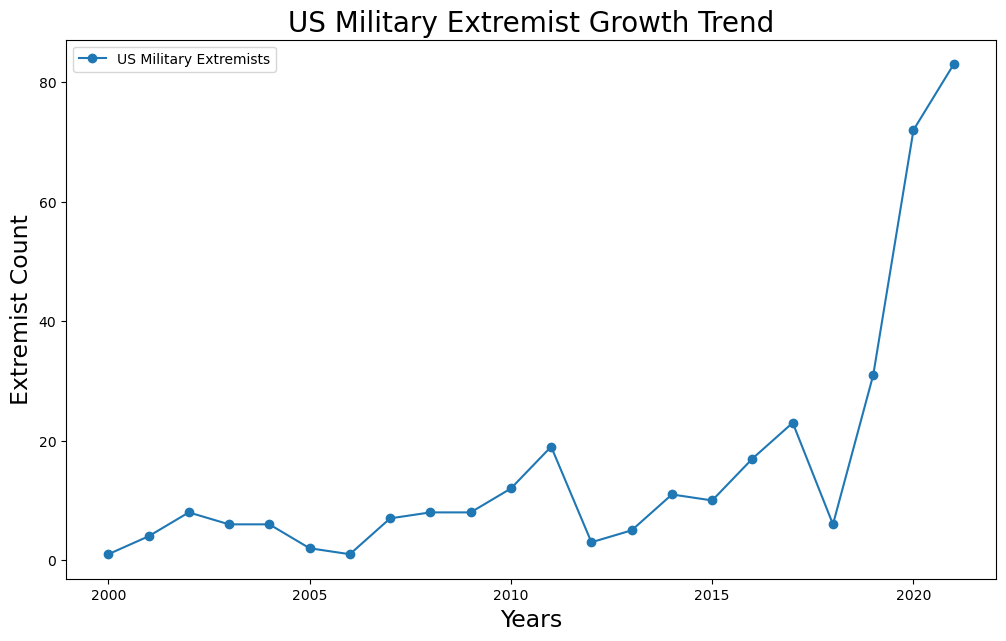

In [14]:
#Plotting Graph 

plt.rcParams["figure.figsize"] = (12, 7)
year_group = fil_mil.groupby("Year_Exposure").count()
x = year_group.index
x
y = year_group["Subject_ID"].values
y

plt.plot(x, y, linestyle="-", marker="o", label="US Military Extremists")
plt.title("US Military Extremist Growth Trend", fontsize=20)
plt.xlabel("Years", fontsize=17)
plt.ylabel("Extremist Count", fontsize=17)
plt.legend()
plt.show()



Radical Islamist  Radical Far Right  Radical Far Left  Single Issue Radical
No                No                 No                Yes                      28
                                     Yes               No                       20
                  Yes                No                No                      254
Yes               No                 No                No                       41
Name: Subject_ID, dtype: int64


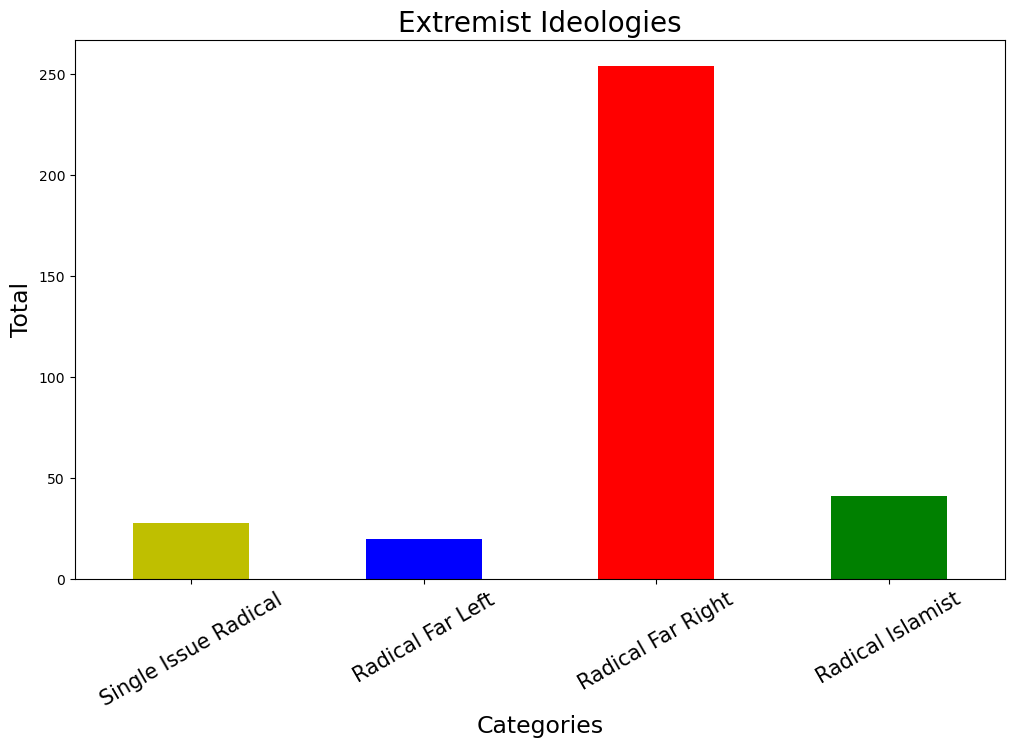

In [87]:
#Top Ideologies

ideologies_count = fil_mil.groupby(by=[
                                        "Radical Islamist",
                                        "Radical Far Right", 
                                        "Radical Far Left", 
                                        "Single Issue Radical"])["Subject_ID"].count()

# print(ideologies_count.index.names)
# # ideologies_count.index[0] = "Single Issue Radical"
# print(ideologies_count.index)
# print(ideologies_count.values)
print(ideologies_count)
ideologies_count.index = ["Single Issue Radical", "Radical Far Left", "Radical Far Right", "Radical Islamist"]

plt.rcParams["figure.figsize"] = (12, 7)

# ["Single Issue Radical", "Radical Far Left", "Radical Far Right", "Radical Islamist"],
ideologies_count.plot(kind='bar', color=['y', 'b', 'r', 'g'])
plt.title("Extremist Ideologies", fontsize=20)
plt.xlabel("Categories", fontsize=17)
plt.xticks(rotation = 30, fontsize=15)
plt.ylabel("Total", fontsize=17)
plt.show()

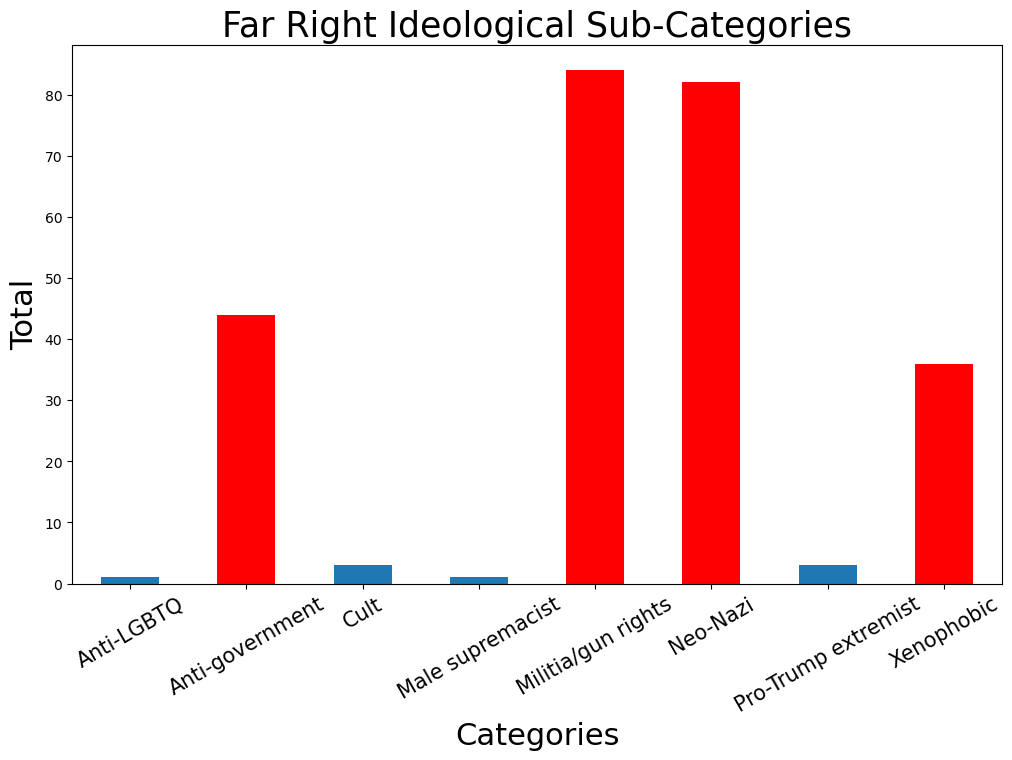

Ideological Group
Anti-LGBTQ              1
Anti-government        44
Cult                    3
Male supremacist        1
Militia/gun rights     84
Neo-Nazi               82
Pro-Trump extremist     3
Xenophobic             36
Name: Subject_ID, dtype: int64


In [88]:
#Top Subgroups of Far Right

#Groupby Radical Far Right

sub_group_count = fil_mil[fil_mil["Radical Far Right"] == 'Yes'].groupby(by='Ideological Group')["Subject_ID"].count()

plt.rcParams["figure.figsize"] = (12, 7)

sub_group_count.plot(kind='bar', color=["C0", "red", "C0", "C0", "red", "red", "C0", "red"])
plt.title("Far Right Ideological Sub-Categories", fontsize=25)
plt.xlabel("Categories", fontsize=22)
plt.xticks(rotation = 30, fontsize=15)
plt.ylabel("Total", fontsize=22)
plt.show()

print(sub_group_count)

Radicalizing Event
2016 Presidential Election         3
2020 Presidential Election        59
Afghanistan/Iraq War               1
COVID-19 Pandemic                 18
Death of George Floyd             13
None                              71
Other                             13
Ruby Ridge/Waco                    1
September 11 terrorist attacks     5
Unknown                           62
Name: Subject_ID, dtype: int64 



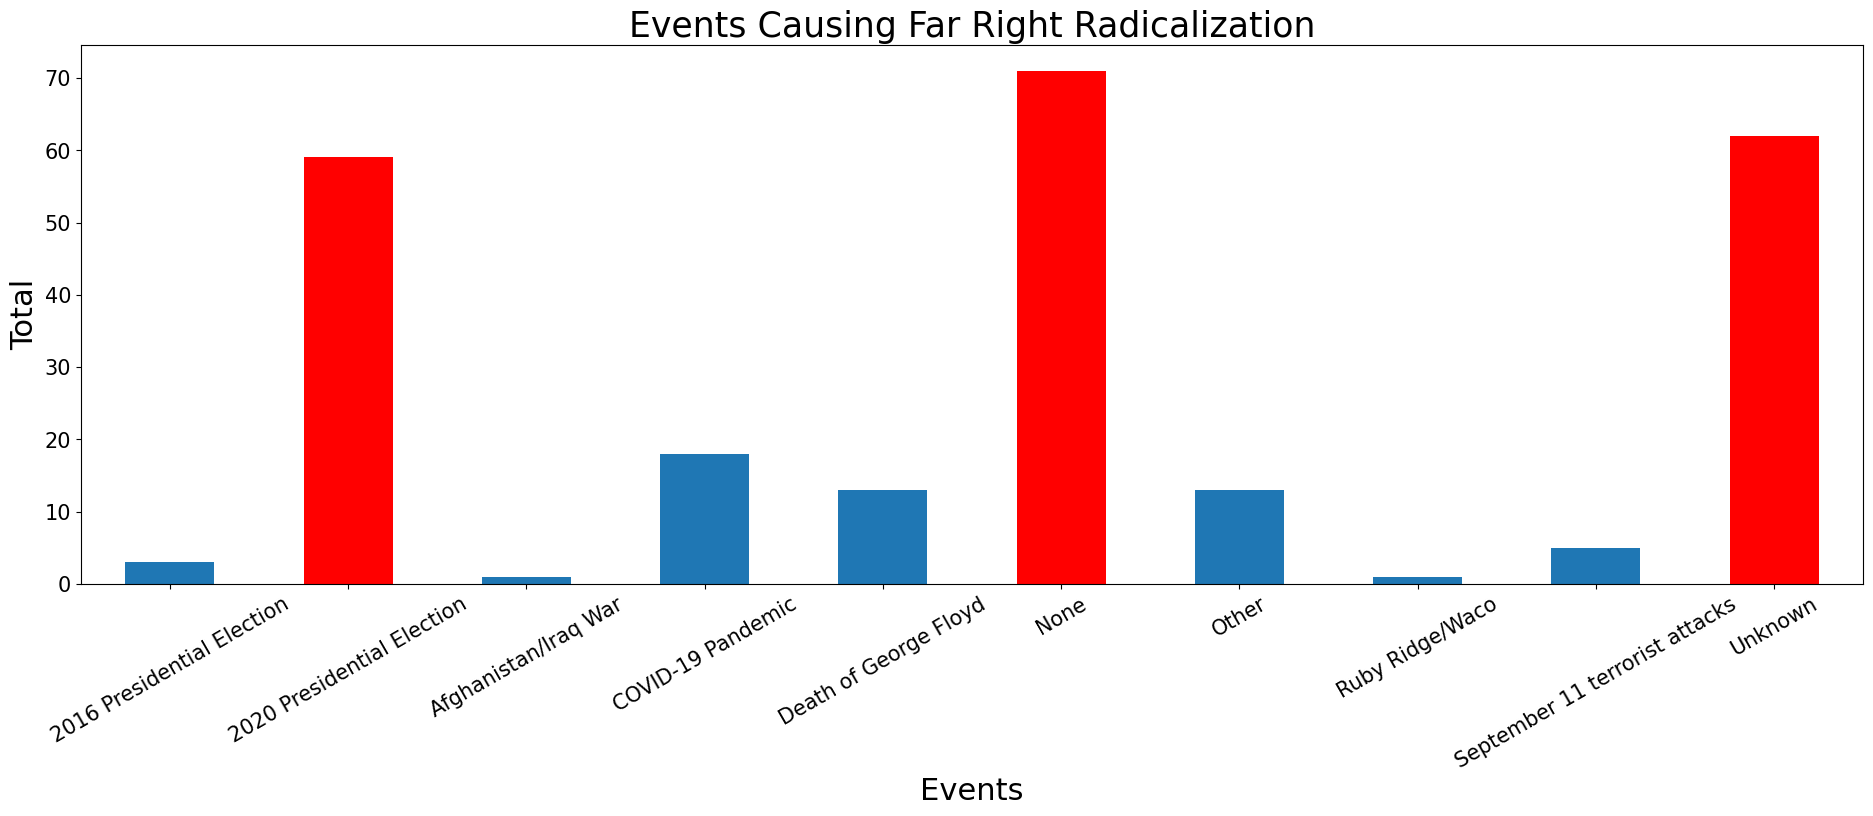

In [86]:
#What event caused top sub-groups?

top_sub_count = fil_mil[(fil_mil["Radical Far Right"] == 'Yes') & ((fil_mil['Ideological Group'] == "Anti-government") | 
                                                                   (fil_mil['Ideological Group'] == "Militia/gun rights") | 
                                                                   (fil_mil['Ideological Group'] == "Neo-Nazi") | 
                                                                   (fil_mil['Ideological Group'] == "Xenophobic"))].groupby(
                                                                       by=["Radicalizing Event"])[
                                                                           "Subject_ID"].count()

# by=["Radicalizing Event", "Foreign Govt Leader", "US Govt Leader"])[
#                                                                            "Subject_ID"].count()

# top_sub_count.loc["Anti-government", "Militia/gun rights", "Neo-Nazi", "Xenophobic"]
# print("Index Names \n", top_sub_count.index.names, "\n")
# print("Index \n", top_sub_count.index, "\n")
# print("Values \n",top_sub_count.values, "\n")
# print("Count \n",top_sub_count, "\n")
print(top_sub_count, "\n")


plt.rcParams["figure.figsize"] = (23, 7)

top_sub_count.plot(kind='bar', color=["C0", "red", "C0", "C0", "C0", "red", "C0", "C0", "C0", "red"])
plt.title("Events Causing Far Right Radicalization", fontsize=25)
plt.xlabel("Events", fontsize=22)
plt.xticks(rotation = 30, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Total", fontsize=22)
plt.show()


In [93]:
top_rad_events = fil_mil[((fil_mil['Radicalizing Event'] == "2020 Presidential Election") | 
                        (fil_mil['Radicalizing Event'] == "None") | 
                        (fil_mil['Radicalizing Event'] == "Unknown"))]

top_rad_events[["Internet", "Media", "Social Media"]].value_counts()#.plot.bar(stacked=True)

Internet            Media               Social Media      
Reaffirmed Beliefs  Unknown             Reaffirmed Beliefs    38
Unknown             Unknown             Unknown               35
Reaffirmed Beliefs  No                  Reaffirmed Beliefs    25
                    Reaffirmed Beliefs  Reaffirmed Beliefs    17
                    No                  Primary               14
                    Unknown             Unknown               12
Unknown             Unknown             No                    11
                                        N/A                   10
                                        Reaffirmed Beliefs     8
Reaffirmed Beliefs  Unknown             Primary                7
Primary             No                  Primary                6
                                        Reaffirmed Beliefs     5
                    Reaffirmed Beliefs  Primary                5
Unknown             Reaffirmed Beliefs  Unknown                4
Reaffirmed Beliefs  Reaffirmed 

In [89]:
#How were those in top events radicalized?

top_rad_events = fil_mil[((fil_mil['Radicalizing Event'] == "2020 Presidential Election") | 
                        (fil_mil['Radicalizing Event'] == "None") | 
                        (fil_mil['Radicalizing Event'] == "Unknown"))]
# .groupby(
#                             by=["Internet", "Media", "Social Media"]).agg({'No':'sum', 'Primary':'sum', 'Reaffirmed Beliefs':'sum', 'Unknown':'sum', })

# 4 bars Internet, Media. Social Media, Unknown


# , "Internet", "Media", "Social Media", "Social Media Platform"]

fil_mil.head(3)
# print("Index Names \n", top_rad_events.index.names, "\n")
# print("Index \n", top_rad_events.index, "\n")
# print("Values \n",top_rad_events.values, "\n")
# print("Count \n",top_rad_events, "\n")
# print("Count \n",top_rad_events.loc[["Yes"]], "\n")


,Subject_ID,Year_Exposure,Ideological Group,Radical Islamist,Radical Far Right,Radical Far Left,Single Issue Radical,Actively Recruited,Internet,Media,Social Media,Social Media Platform,Foreign Govt Leader,US Govt Leader,Radicalizing Event
0,10127,2021,Anti-government,No,Yes,No,No,Unknown,Reaffirmed Beliefs,Reaffirmed Beliefs,Primary,Facebook,No,Yes,COVID-19 Pandemic
1,10133,2021,Militia/gun rights,No,Yes,No,No,Unknown,Reaffirmed Beliefs,No,Reaffirmed Beliefs,Facebook,No,Yes,2020 Presidential Election
2,10147,2021,Anti-government,No,Yes,No,No,No,Reaffirmed Beliefs,Reaffirmed Beliefs,Reaffirmed Beliefs,Facebook,No,Yes,September 11 terrorist attacks
